In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# MNIST veri setini yükleme ve eğitim/test setlerine ayırma
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Verileri CNN modeline uygun formata dönüştürme ve normalizasyon
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# CNN modeli oluşturma
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Önceki Dropout katmanı
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Yeni Dropout katmanı
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Bir diğer Dropout katmanı
model.add(Dense(10, activation='softmax'))

# Modeli derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğitme
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Modelin başarımını yazdırma
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
print("Eğitim Doğruluğu:", train_acc)
print("Test Doğruluğu:", test_acc)






Epoch 1/5


938/938 [==============================] - 69s 71ms/step - loss: 0.3634 - accuracy: 0.8828 - val_loss: 0.0584 - val_accuracy: 0.9837
Epoch 2/5
938/938 [==============================] - 69s 74ms/step - loss: 0.0838 - accuracy: 0.9801 - val_loss: 0.0476 - val_accuracy: 0.9874
Epoch 3/5
938/938 [==============================] - 69s 73ms/step - loss: 0.0635 - accuracy: 0.9846 - val_loss: 0.0503 - val_accuracy: 0.9875
Epoch 4/5
938/938 [==============================] - 73s 78ms/step - loss: 0.0481 - accuracy: 0.9883 - val_loss: 0.0423 - val_accuracy: 0.9890
Epoch 5/5
938/938 [==============================] - 71s 76ms/step - loss: 0.0414 - accuracy: 0.9905 - val_loss: 0.0419 - val_accuracy: 0.9904
Eğitim Doğruluğu: [0.8827999830245972, 0.9800833463668823, 0.98458331823349, 0.98826664686203, 0.9904833436012268]
Test Doğruluğu: [0.9836999773979187, 0.9873999953269958, 0.987500011920929, 0.9890000224113464, 0.9904000163078308]


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 128)         1

In [5]:
model.save("model_sayilar2.h5")

c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Test verileri üzerinde tahmin yapma
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Gerçek etiketlerin elde edilmesi
true_labels = np.argmax(test_labels, axis=1)

# Hassasiyet (Precision) hesaplama
precision = precision_score(true_labels, predicted_labels, average='weighted')

# Recall hesaplama
recall = recall_score(true_labels, predicted_labels, average='weighted')

# F1 skoru hesaplama
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Hassasiyet (Precision):", precision)
print("Recall:", recall)
print("F1 Skoru:", f1)
print("Eğitim Doğruluğu:", train_acc)
print("Test Doğruluğu:", test_acc)


313/313 [==============================] - 5s 16ms/step
Hassasiyet (Precision): 0.9889402681576439
Recall: 0.9888
F1 Skoru: 0.9887962828608022
Eğitim Doğruluğu: [0.8913833498954773, 0.9797999858856201, 0.9852499961853027, 0.9884666800498962, 0.9900333285331726]
Test Doğruluğu: [0.9836000204086304, 0.9864000082015991, 0.9840999841690063, 0.9894999861717224, 0.9887999892234802]


313/313 [==============================] - 3s 9ms/step


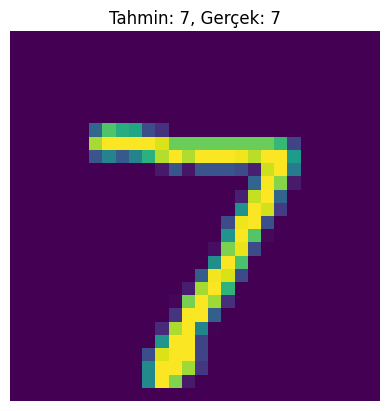

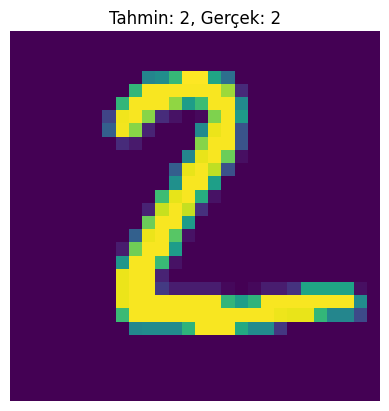

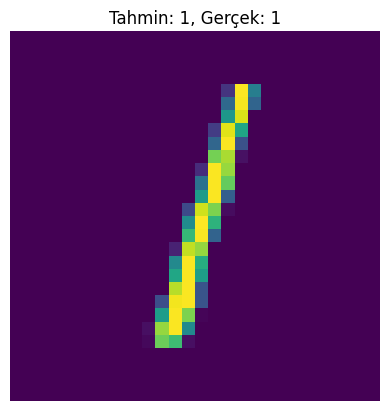

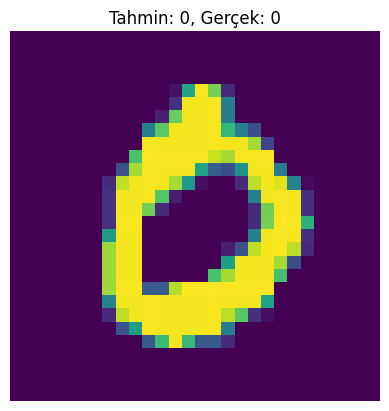

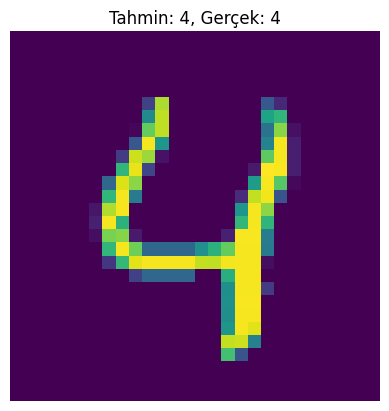

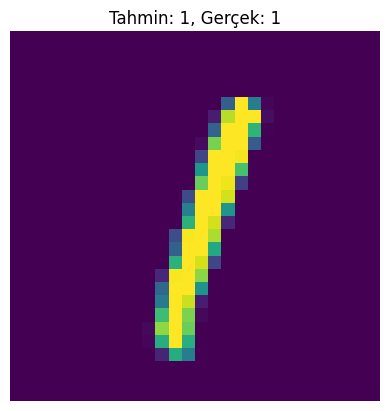

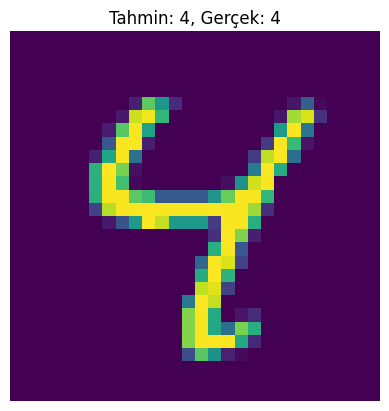

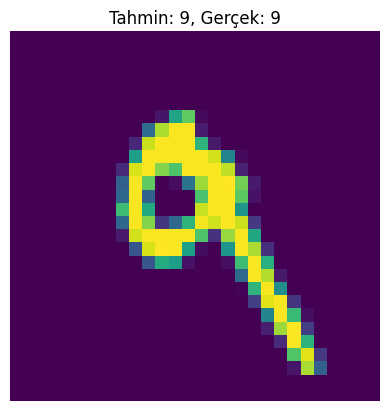

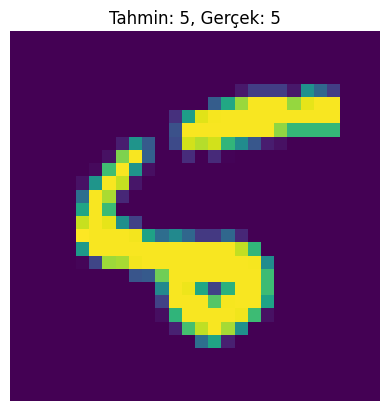

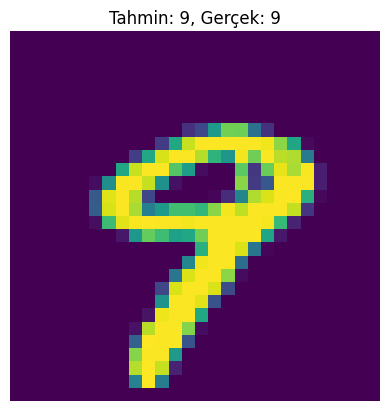

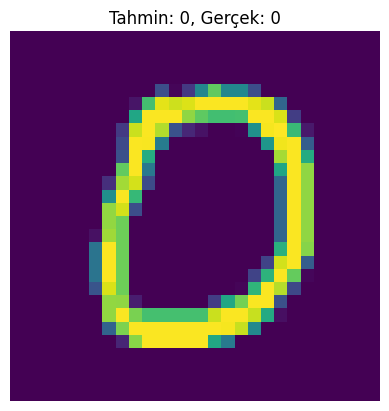

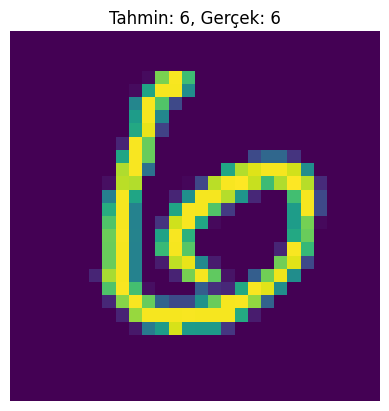

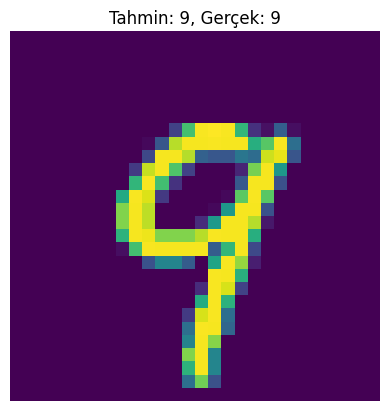

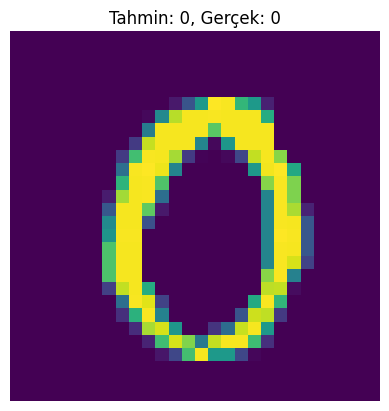

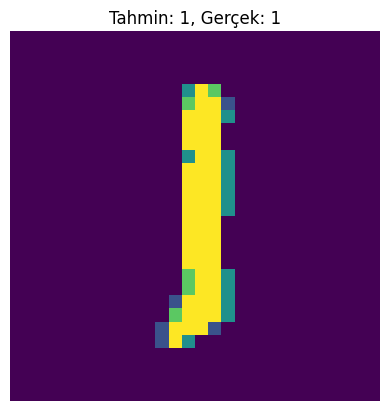

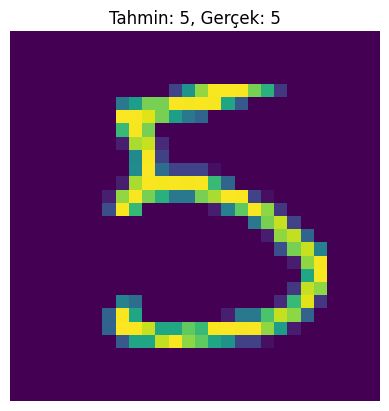

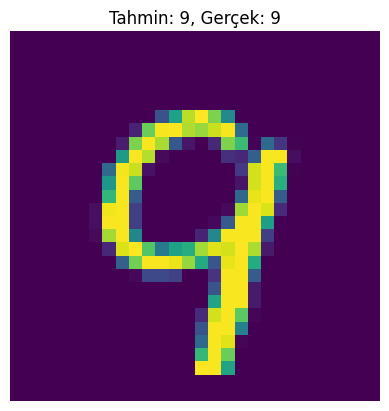

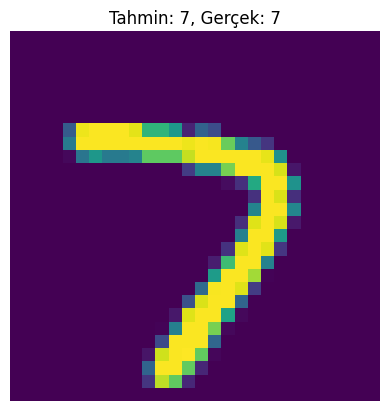

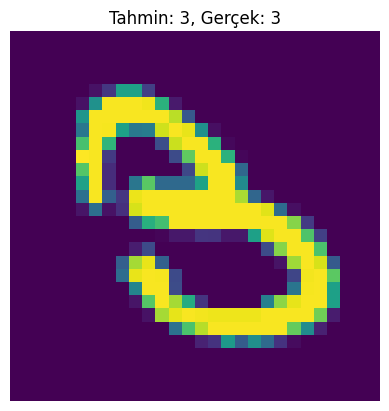

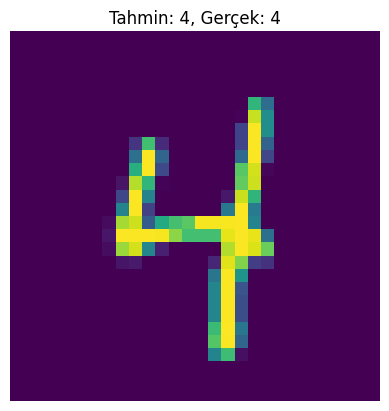

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Modelin tahmin yapması için test veri seti üzerinde kullanılması
predictions = model.predict(test_images)

# İlk birkaç tahmini kontrol edelim ve resimleri gösterelim
for i in range(20):
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    
    # Resmi ekrana basma
    plt.figure()
    plt.imshow(test_images[i])
    plt.title(f"Tahmin: {predicted_label}, Gerçek: {true_label}")
    plt.axis('off')  # Eksenleri kapatma
    plt.show()


1/1 [==============================] - 0s 47ms/step


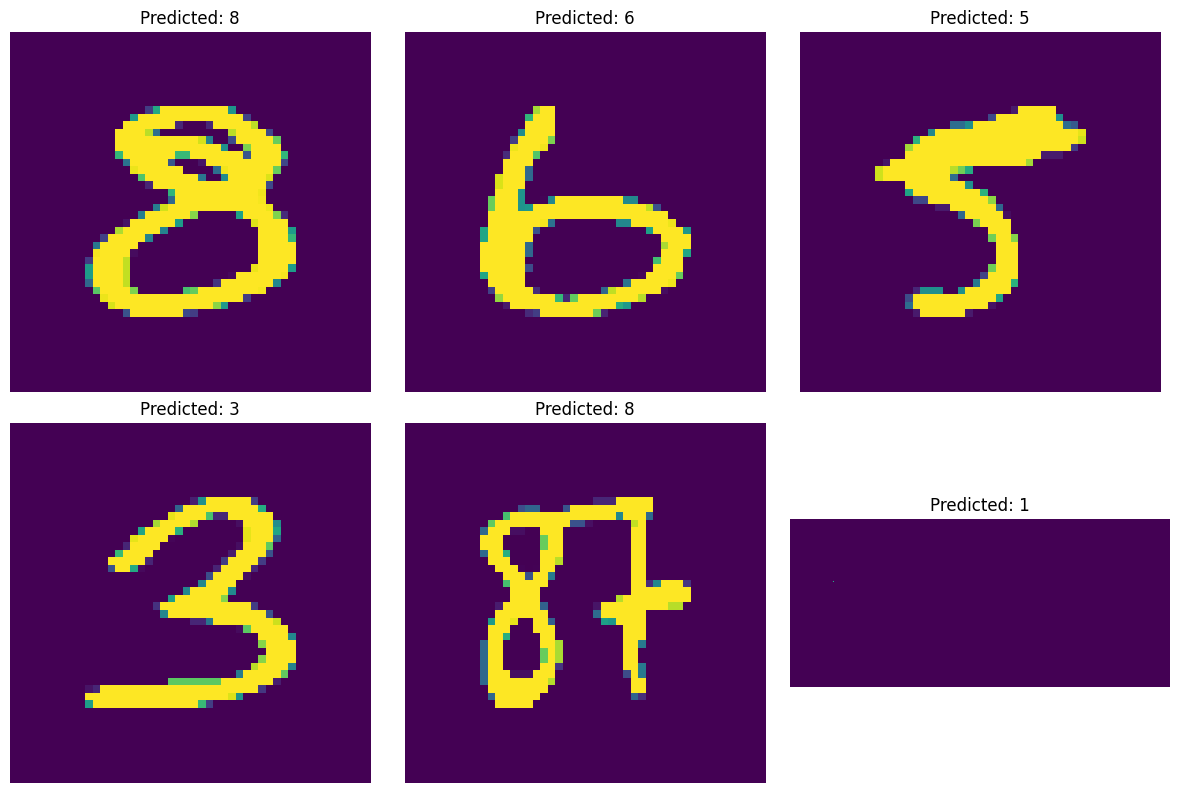

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image as keras_image

# Dışarıdan alınacak resimlerin yollarını belirtin
image_paths = [
    "0.png",
    "2.png",
    "3.png",
    "4.png",
    "5.png",
    "1.png"
]

# Resimleri gösterme ve tahmin yapma
plt.figure(figsize=(12, 8))
for i, path in enumerate(image_paths, 1):
    plt.subplot(2, 3, i)
    
    # Resmi yükleme ve gösterme
    img = plt.imread(path)
    plt.imshow(img)
    plt.axis('off')
    
    # Resmi modele uygun formata dönüştürme
    external_image = keras_image.load_img(path, target_size=(28, 28), color_mode='grayscale')
    external_image_array = keras_image.img_to_array(external_image)
    external_image_array = external_image_array.reshape(1, 28, 28, 1) / 255.0  # Normalizasyon
    
    # Modelde tahmin yapma
    predicted_label = np.argmax(model.predict(external_image_array), axis=-1)
    plt.title(f"Predicted: {predicted_label[0]}")
    
plt.tight_layout()
plt.show()


In [9]:


from PIL import Image
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image as keras_image # type: ignore
import tensorflow as tf

model_sayi = tf.keras.models.load_model('model_sayilar2.h5') 

# Dışarıdan alınan görüntüyü yükleme ve img değişkenine atama
img_path = 'img.PNG'  # Burada dışarıdan alınan resmin yolunu belirtin
img = Image.open(img_path)

# SADECE SAYILAR 
# componets listesi ile
def list_predict_image_number(component):
    
    img = cv2.resize(component, (28, 28))
    
    # Resmi modele uygun formata dönüştürme
    external_image_array = keras_image.img_to_array(img)
    external_image_array = external_image_array.reshape(1, 28, 28, 1) / 255.0  # Normalizasyon

    return external_image_array

def label_list_number(image_list):
    predicted_labels_numbers = []
    for img in image_list:
        # Modelde tahmin yapma
        external_image_array = list_predict_image_number(img)
        predicted_label = np.argmax(model_sayi.predict(external_image_array), axis=-1)
        predicted_labels_numbers.append(predicted_label)
        predicted_label = predicted_label[0]
        predicted_labels.append(predicted_label)
    return predicted_labels_numbers


label_list_number(img)

TypeError: 'PngImageFile' object is not iterable